In [9]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=d0666656f9c6fc7bfbf7048e05b5fdd5f995fdf658244d29389a027da7e18e79
  Stored in directory: c:\users\tbrac\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [15]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [21]:
#Beginning Data Retrieval
print("Beginning Data Retrieval ")
print("-----------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : dalby
Processing Record 2 of Set 1 : atuona
Processing Record 3 of Set 1 : luwuk
Processing Record 4 of Set 1 : albany
Processing Record 5 of Set 1 : lensk
Processing Record 6 of Set 1 : rikitea
Processing Record 7 of Set 1 : karratha
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : arraial do cabo
Processing Record 10 of Set 1 : sioux lookout
Processing Record 11 of Set 1 : chokwe
Processing Record 12 of Set 1 : husavik
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : provideniya
Processing Record 15 of Set 1 : aklavik
Processing Record 16 of Set 1 : tiksi
Processing Record 17 of Set 1 : novo aripuana
Processing Record 18 of Set 1 : mvuma
Processing Record 19 of Set 1 : rorvik
Processing Record 20 of Set 1 : shangrao
Processing Record 21 of Set 1 : sarangani
Processing Record 22 of Set 1 : mataura
Processing Record 23 of Set 1 : kande
Processing Recor

Processing Record 33 of Set 4 : maniitsoq
Processing Record 34 of Set 4 : mersing
City not found. Skipping...
Processing Record 35 of Set 4 : comodoro rivadavia
City not found. Skipping...
Processing Record 36 of Set 4 : tual
Processing Record 37 of Set 4 : pekan
Processing Record 38 of Set 4 : mezhdurechenskiy
Processing Record 39 of Set 4 : trincomalee
Processing Record 40 of Set 4 : nanortalik
Processing Record 41 of Set 4 : santo domingo
City not found. Skipping...
Processing Record 42 of Set 4 : vale
Processing Record 43 of Set 4 : saint marys
Processing Record 44 of Set 4 : carnarvon
Processing Record 45 of Set 4 : kushmurun
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 : saldanha
Processing Record 47 of Set 4 : hithadhoo
Processing Record 48 of Set 4 : magistralnyy
Processing Record 49 of Set 4 : capitao poco
Processing Record 50 of Set 4 : ishigaki
Processing Record 0 of Set 5 : cap malheureux
Processing Record 1 of Set 5 : san policarpo


Processing Record 16 of Set 8 : travnik
Processing Record 17 of Set 8 : nizwa
Processing Record 18 of Set 8 : port-gentil
Processing Record 19 of Set 8 : bose
Processing Record 20 of Set 8 : otradnoye
Processing Record 21 of Set 8 : mulbagal
Processing Record 22 of Set 8 : novyy urengoy
Processing Record 23 of Set 8 : atambua
Processing Record 24 of Set 8 : conceicao do araguaia
Processing Record 25 of Set 8 : kayerkan
Processing Record 26 of Set 8 : mattru
Processing Record 27 of Set 8 : poum
Processing Record 28 of Set 8 : touros
Processing Record 29 of Set 8 : marystown
Processing Record 30 of Set 8 : sjovegan
Processing Record 31 of Set 8 : marzuq
Processing Record 32 of Set 8 : nenjiang
City not found. Skipping...
Processing Record 33 of Set 8 : high level
Processing Record 34 of Set 8 : ust-omchug
Processing Record 35 of Set 8 : madona
Processing Record 36 of Set 8 : szamotuly
Processing Record 37 of Set 8 : gaya
Processing Record 38 of Set 8 : bereda
Processing Record 39 of Set 

Processing Record 49 of Set 11 : souillac
Processing Record 50 of Set 11 : zheleznodorozhnyy
Processing Record 0 of Set 12 : kamina
Processing Record 1 of Set 12 : shibetsu
Processing Record 2 of Set 12 : panguna
Processing Record 3 of Set 12 : tonantins
Processing Record 4 of Set 12 : haines junction
Processing Record 5 of Set 12 : nelson bay
Processing Record 6 of Set 12 : kloulklubed
-----------------------------
Data Retrieval Complete
-----------------------------


In [22]:
#creating database from pulled information
weather_df = pd.DataFrame({
    "City": city_name_list,
    "Cloudiness" : cloudiness_list,
    "Country" : country_list,
    "Date" : date_list,
    "Humidity" : humidity_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Wind Speed" : wind_speed_list
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dalby,0,AU,1627685859,64,-27.1833,151.2667,56.10,12.12
1,Atuona,34,PF,1627685860,75,-9.8000,-139.0333,77.18,15.52
2,Luwuk,69,ID,1627685860,88,-0.9516,122.7875,77.31,3.67
3,Albany,20,US,1627685821,55,42.6001,-73.9662,70.57,4.00
4,Lensk,7,RU,1627685860,42,60.7253,114.9278,65.14,4.54


In [23]:
weather_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

Analysis: As you get closer to the equator (latitude = 0) the temperatures rise. This is a pretty normal bell shaped curve


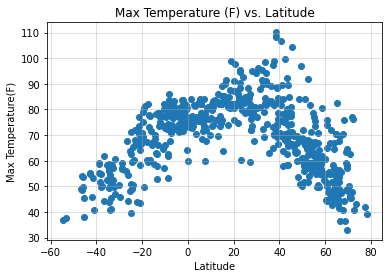

In [34]:
#Plotting Scatter Plot of Temperature vs Latitude
lat = weather_df['Lat']
temp = weather_df['Max Temp']
plt.scatter(lat, temp)
plt.title("Max Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(alpha=.5)
plt.savefig("../Images/Max Temp vs Latitude.png")
print("Analysis: As you get closer to the equator (latitude = 0) the temperatures rise. This is a pretty normal bell shaped curve")

Analysis: The regions closer to the equator seem to have higher average levels of humidity.The further away, the more dispersed the data is.


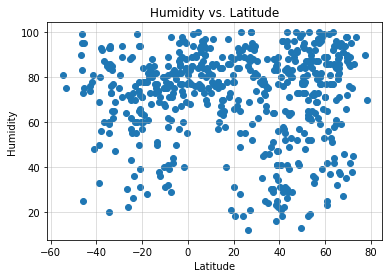

In [37]:
#Plotting Humidity vs Latitude
humidity = weather_df['Humidity']
plt.scatter(lat, humidity)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.5)
plt.savefig("../Images/Max Temp vs Humidity.png")
print("Analysis: The regions closer to the equator seem to have higher average levels of humidity.The further away, the more dispersed the data is.")

Analysis: There seems to be no correlation between latitude and how cloudy a city is.


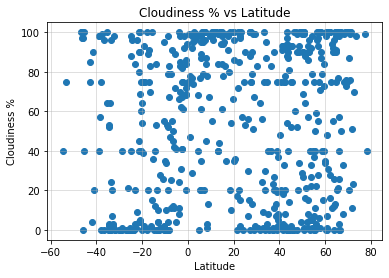

In [41]:
#Plotting Cloudiness vs Latitude
cloudiness = weather_df['Cloudiness']
plt.scatter(lat, cloudiness)
plt.title("Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(alpha=.5)
plt.savefig("../Images/Cloudiness vs Latitude")
print("Analysis: There seems to be no correlation between latitude and how cloudy a city is.")

Analysis: The majority of the cities pulled seem to be under 10mph average. The higher wind speeds are in the lower portion of the northern hemisphere or the southern hemispher.


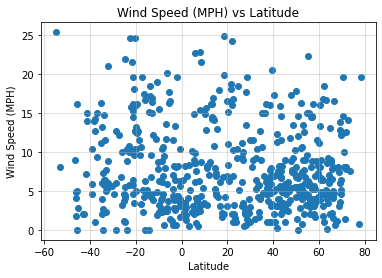

In [44]:
#Plotting Windspeed vs Latitude
wind_speed = weather_df['Wind Speed']
plt.scatter(lat, wind_speed)
plt.title("Wind Speed (MPH) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=.5)
plt.savefig("../Images/Wind Speed vs Latitude")
print("Analysis: The majority of the cities pulled seem to be under 10mph average. The higher wind speeds are in the lower portion of the northern hemisphere or the southern hemispher.")

In [49]:
northern_hemisphere_df = weather_df.loc[weather_df['Lat'] >=0]
southern_hemisphere_df = weather_df.loc[weather_df['Lat'] <0]

In [50]:
northern_hemisphere_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Albany,20,US,1627685821,55,42.6001,-73.9662,70.57,4.00
4,Lensk,7,RU,1627685860,42,60.7253,114.9278,65.14,4.54
9,Sioux Lookout,90,CA,1627685862,73,50.1001,-91.9170,71.98,8.05
11,Husavik,3,IS,1627685863,71,66.0449,-17.3389,53.51,1.52
13,Provideniya,100,RU,1627685863,94,64.3833,-173.3000,47.21,4.76
14,Aklavik,75,CA,1627685864,46,68.2191,-135.0107,76.03,8.05
15,Tiksi,51,RU,1627685864,75,71.6872,128.8694,47.62,7.78
18,Rørvik,100,NO,1627685865,84,64.8621,11.2373,53.85,6.49
19,Shangrao,51,CN,1627685865,88,28.4532,117.9686,78.85,1.34
20,Sarangani,77,PH,1627685866,75,5.4033,125.4636,83.91,8.93


In [51]:
southern_hemisphere_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dalby,0,AU,1627685859,64,-27.1833,151.2667,56.10,12.12
1,Atuona,34,PF,1627685860,75,-9.8000,-139.0333,77.18,15.52
2,Luwuk,69,ID,1627685860,88,-0.9516,122.7875,77.31,3.67
5,Rikitea,84,PF,1627685861,76,-23.1203,-134.9692,71.98,10.78
6,Karratha,69,AU,1627685861,72,-20.7377,116.8463,66.58,9.57
7,Ushuaia,40,AR,1627685572,81,-54.8000,-68.3000,37.06,25.32
8,Arraial do Cabo,20,BR,1627685862,60,-22.9661,-42.0278,67.96,5.75
10,Chokwé,0,MZ,1627685862,89,-24.5333,32.9833,59.67,4.47
12,Punta Arenas,75,CL,1627685863,75,-53.1500,-70.9167,37.51,8.05
16,Novo Aripuanã,4,BR,1627685864,50,-5.1206,-60.3797,78.87,1.36
